In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import os
from tqdm import tqdm
import cv2
import shutil

In [2]:
from google.colab import files

In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle competitions download -c umor-classification

 93% 179M/193M [00:02<00:00, 52.0MB/s]
100% 193M/193M [00:02<00:00, 75.1MB/s]


In [12]:
!unzip umor-classification.zip

Archive:  umor-classification.zip
  inflating: images/images/1006.png  
  inflating: images/images/1028.png  
  inflating: images/images/1046.png  
  inflating: images/images/1062.png  
  inflating: images/images/1066.png  
  inflating: images/images/1068.png  
  inflating: images/images/1070.png  
  inflating: images/images/1073.png  
  inflating: images/images/1091.png  
  inflating: images/images/1097.png  
  inflating: images/images/1105.png  
  inflating: images/images/1127.png  
  inflating: images/images/1138.png  
  inflating: images/images/1154.png  
  inflating: images/images/1156.png  
  inflating: images/images/1159.png  
  inflating: images/images/1183.png  
  inflating: images/images/1191.png  
  inflating: images/images/1202.png  
  inflating: images/images/1218.png  
  inflating: images/images/1230.png  
  inflating: images/images/1234.png  
  inflating: images/images/1235.png  
  inflating: images/images/1240.png  
  inflating: images/images/1253.png  
  inflating: ima

### train csv file (labels)

In [13]:
# Load CSV file
df_train = pd.read_csv('trainset.csv')
df_train

,Unnamed: 0,Id,Class
0,211,8602,Malignant
1,315,7464,Malignant
2,165,5832,Malignant
3,188,2843,Malignant
4,710,5272,Benign
...,...,...,...
534,763,8176,Benign
535,192,5434,Malignant
536,629,5366,Benign
537,559,9811,Benign


### load image

In [14]:
# Load and preprocess images
image_folder = "/content/images/images/"
image_filenames = os.listdir(image_folder)
image_filenames

['6571.png',
 '1202.png',
 '9913.png',
 '1097.png',
 '3783.png',
 '5708.png',
 '4407.png',
 '4833.png',
 '2510.png',
 '9101.png',
 '7464.png',
 '4649.png',
 '8054.png',
 '3295.png',
 '5794.png',
 '7806.png',
 '7600.png',
 '7750.png',
 '1340.png',
 '4786.png',
 '9448.png',
 '7160.png',
 '1379.png',
 '2332.png',
 '1159.png',
 '8025.png',
 '7965.png',
 '2760.png',
 '9513.png',
 '2029.png',
 '8476.png',
 '1105.png',
 '8348.png',
 '6583.png',
 '1938.png',
 '6697.png',
 '6568.png',
 '2660.png',
 '3936.png',
 '3390.png',
 '1453.png',
 '1802.png',
 '9820.png',
 '5323.png',
 '8522.png',
 '4723.png',
 '8507.png',
 '4569.png',
 '4947.png',
 '7870.png',
 '8657.png',
 '5437.png',
 '4412.png',
 '2651.png',
 '6048.png',
 '1073.png',
 '9939.png',
 '9806.png',
 '6497.png',
 '2587.png',
 '9814.png',
 '4049.png',
 '7620.png',
 '2165.png',
 '7159.png',
 '8993.png',
 '1091.png',
 '6507.png',
 '3937.png',
 '7585.png',
 '1362.png',
 '7379.png',
 '4977.png',
 '2000.png',
 '8659.png',
 '4928.png',
 '2323.png',

In [16]:
df_train['Class'].value_counts()

Benign       300
Malignant    148
Normal        91
Name: Class, dtype: int64

In [17]:
labels = ['Benign','Malignant','Normal']

In [18]:
image_files_with_labels = set()

In [19]:
image_labels = {}

In [20]:
# Populate the set using data from the CSV file
for index, row in df_train.iterrows():
    image_id = str(row['Id']) + ".png"
    image_files_with_labels.add(image_id)

In [24]:

# Create the "test" subfolder inside the image folder if it doesn't exist
test_folder = os.path.join(image_folder, "test")
if not os.path.exists(test_folder):
    os.makedirs(test_folder)

# Iterate through the image files and move those without labels to the "test" subfolder
for image_file in image_filenames:
    if image_file not in image_files_with_labels:
        image_file_path = os.path.join(image_folder, image_file)
        new_image_file_path = os.path.join(test_folder, image_file)

        try:
            shutil.move(image_file_path, new_image_file_path)
            print(f"Moved image to 'test' subfolder: {image_file}")
        except Exception as e:
            print(f"Error moving image {image_file}: {e}")

Moved image to 'test' subfolder: 6571.png
Moved image to 'test' subfolder: 9913.png
Moved image to 'test' subfolder: 3783.png
Moved image to 'test' subfolder: 5708.png
Moved image to 'test' subfolder: 9101.png
Moved image to 'test' subfolder: 5794.png
Moved image to 'test' subfolder: 1159.png
Moved image to 'test' subfolder: 7965.png
Moved image to 'test' subfolder: 2029.png
Moved image to 'test' subfolder: 1938.png
Moved image to 'test' subfolder: 9820.png
Moved image to 'test' subfolder: 4947.png
Moved image to 'test' subfolder: 7870.png
Moved image to 'test' subfolder: 8657.png
Moved image to 'test' subfolder: 8993.png
Moved image to 'test' subfolder: 7585.png
Moved image to 'test' subfolder: 8659.png
Moved image to 'test' subfolder: 3914.png
Moved image to 'test' subfolder: 2718.png
Moved image to 'test' subfolder: 8981.png
Moved image to 'test' subfolder: 9444.png
Moved image to 'test' subfolder: 8853.png
Moved image to 'test' subfolder: 9538.png
Moved image to 'test' subfolder: 8

In [25]:
# Create lists to store images and labels
x_train = []  # List for images
y_train = []  # List for labels

# Iterate through all images and labels
for image_file, label in image_labels.items():
    image_path = os.path.join(image_folder, image_file)
    image = Image.open(image_path)

    # Append image and label to their respective lists
    x_train.append(image)
    y_train.append(label)

In [26]:
x_train

[]

In [27]:
y_train

[]

In [29]:
# Display the first few images with labels
num_samples = min(8, len(x_train))  # Number of samples to display
fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))

for i in range(num_samples):
    axes[i].imshow(x[i])
    axes[i].set_title(f"Label: {y[i]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

ValueError: ignored

<Figure size 1500x500 with 0 Axes>

### resize the image

In [89]:
from PIL import Image

def resize_images(images, target_size):
    resized_images = []

    for image in images:
        resized_image = image.resize(target_size, Image.ANTIALIAS)
        resized_images.append(resized_image)

    return resized_images

# Define the target image size
target_size = (250, 250)  # Replace with your desired width and height

# Call the function to resize the images
resized_x = resize_images(x_train, target_size)

<ipython-input-89-292314f3cbb7>:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_image = image.resize(target_size, Image.ANTIALIAS)


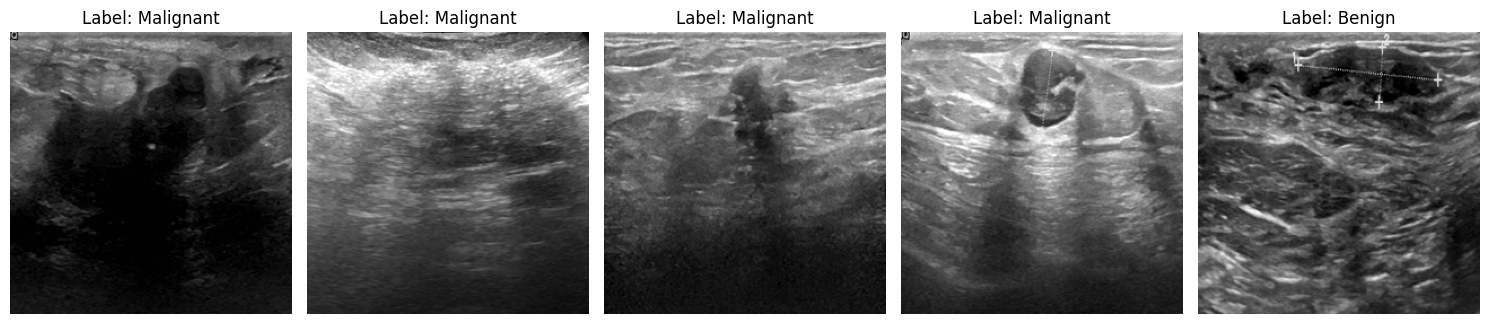

In [90]:
# Define the number of images to display
num_images_to_display = 5  # Change this to the desired number of images

# Display the first few resized images
fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 5))

for i in range(num_images_to_display):
    axes[i].imshow(resized_x[i])
    axes[i].set_title(f"Label: {y[i]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()